In [1]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=["SH"])



---------

The following environment variables are available:

* `SH_CLIENT_SECRET`, `SH_CLIENT_NAME`, `SH_INSTANCE_ID`, `SH_CLIENT_ID`


### Installing packages, setting up variables

In [2]:
import os
import numpy as np
import pygrib # If using EDC JupyterLab, please install pygrib first --> "pip install pygrib"
import cdsapi
import matplotlib.pyplot as plt

In [3]:
import geojson
import shapely.wkt


area = shapely.wkt.loads('POLYGON((11.9 44.45, 11.9 45.9, 13.9 45.9, 13.9 44.45, 11.9 44.45))')
gj_feat = geojson.Feature(geometry=area, properties={})

In [4]:
import shapely.geometry
import IPython.display
IPython.display.GeoJSON(gj_feat)

<IPython.display.GeoJSON object>

### API request to Copernicus Climate Data Store (downloads rain data to computer)

In [5]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'grib',
        'variable': 'total_precipitation',
        'product_type': 'monthly_averaged_reanalysis',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            45.9, 11.9, 44.45,
            13.9,
        ],
    },
    'rain_79-20_nab.grib')

2021-06-29 20:16:13,558 INFO Welcome to the CDS
2021-06-29 20:16:13,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2021-06-29 20:16:13,914 INFO Request is completed
2021-06-29 20:16:13,915 INFO Downloading https://download-0012.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1624983736.9001102-25525-7-5aa12d46-c5f6-4e27-b369-49ff33240c0f.grib to rain_79-20_nab.grib (118.1K)
2021-06-29 20:16:14,144 INFO Download rate 518K/s


Result(content_length=120960,content_type=application/x-grib,location=https://download-0012.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1624983736.9001102-25525-7-5aa12d46-c5f6-4e27-b369-49ff33240c0f.grib)

In [6]:
#Opening the downloaded dataset
rain_iter = pygrib.open('rain_79-20_nab.grib')

In [7]:
for month in rain_iter:
    print(month)

1:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197812311800
2:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197901311800
3:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197902281800
4:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197903311800
5:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197904301800
6:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197905311800
7:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197906301800
8:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197907311800
9:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-12 hrs (avgad):from 197908311800
10:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst

In [8]:
for attr in month.keys():
    print(attr)

globalDomain
GRIBEditionNumber
eps
offsetSection0
section0Length
totalLength
editionNumber
WMO
productionStatusOfProcessedData
section1Length
wrongPadding
table2Version
centre
centreDescription
generatingProcessIdentifier
gridDefinition
indicatorOfParameter
parameterName
parameterUnits
indicatorOfTypeOfLevel
pressureUnits
typeOfLevelECMF
typeOfLevel
level
yearOfCentury
month
day
hour
minute
second
unitOfTimeRange
P1
P2
timeRangeIndicator
numberIncludedInAverage
numberMissingFromAveragesOrAccumulations
centuryOfReferenceTimeOfData
subCentre
paramIdECMF
paramId
cfNameECMF
cfName
cfVarNameECMF
cfVarName
unitsECMF
units
nameECMF
name
decimalScaleFactor
setLocalDefinition
optimizeScaleFactor
dataDate
year
dataTime
julianDay
stepUnits
stepType
stepRange
startStep
endStep
marsParam
validityDate
validityTime
deleteLocalDefinition
localUsePresent
localDefinitionNumber
GRIBEXSection1Problem
marsClass
marsType
marsStream
experimentVersionNumber
perturbationNumber
numberOfForecastsInEnsemble
grib2

In [9]:
rain_iter.rewind()
for month in rain_iter:
    print(month.units)

m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m


In [10]:
rain_iter.rewind()
nab_tp = []                # nab_tp = North Adriatic Basin Total Precipitation

for month in rain_iter:
#     print(month.parameterName)
#     print('Date: ', month.validDate, '\n')
#     print('Latitude: \n', month.latitudes)
#     print('shape: ', month.latitudes.shape)
#     print('Longitudes: \n', month.longitudes)
#     print('shape: ', month.longitudes.shape)
#     print('\nValues shape: ', month.values.shape)
#     print('Values (m/s): \n')
#     print(month.values)
#     print('____________________________________')
    avg = np.round(np.mean(month.values),3)
    nab_tp.append(avg)

nab_tp = np.array(nab_tp)
nab_tp = nab_tp.reshape(42,12)

#Extracting 2020 data
tp_2020 = nab_tp[41]
nab_tp = np.delete(nab_tp, (0), axis=0)

# Converting from meter to millimeter
nab_tp *= 100
tp_2020 *= 100 

print('shape of 1981-2019 data: ', nab_tp.shape)

shape of 1981-2019 data:  (41, 12)


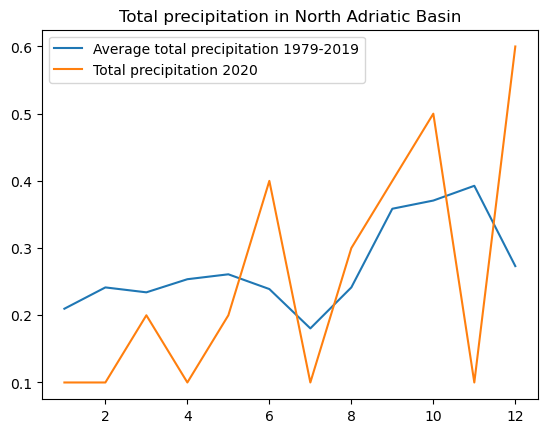

In [11]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]

# Plotting each year separately (2010-2019)
# for tp in nab_tp:
#     plt.plot(months, tp)
#     plt.show()

# Plotting average for all years (2010-2019)
avg_nab_tp = np.mean(nab_tp, axis=0)
plt.plot(months, avg_nab_tp, label='Average total precipitation 1979-2019')
plt.plot(months, tp_2020, label='Total precipitation 2020')
plt.legend()
plt.title('Total precipitation in North Adriatic Basin')
plt.show()

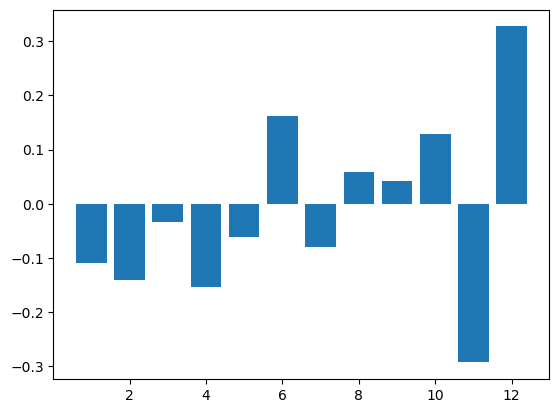

In [12]:
#Computing deviations between the two above plots
deviations = tp_2020 - avg_nab_tp 
plt.bar(months, deviations)
plt.show()

In [14]:
# Using Max Min normalisation to place deviations on the same scale
devs_abs = abs(deviations)
norm_dev = (devs_abs-devs_abs.min())/(devs_abs.max()-devs_abs.min())

print('Normalized deviation for April: ', np.round(norm_dev[3], 3))

Normalized deviation for April:  0.408
